In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [24]:
!git clone 'https://github.com/maniram3112/stock-vs-crypto-risk-return-analysis.git'

fatal: destination path 'stock-vs-crypto-risk-return-analysis' already exists and is not an empty directory.


In [25]:
# ----------------------------
# Load dataset
# ----------------------------
# Load CSV
df = pd.read_csv("stock-vs-crypto-risk-return-analysis/data/merged.csv", parse_dates=["time"])
df = df.sort_values("time")
df.set_index("time", inplace=True)

/tmp/ipython-input-552100964.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("stock-vs-crypto-risk-return-analysis/data/merged.csv", parse_dates=["time"])


In [28]:
# Melt from wide to long format
df_long = df.reset_index().melt(id_vars="time", var_name="Ticker", value_name="Close")
df_long = df_long.sort_values(["Ticker","time"])
df_long.set_index("time", inplace=True)

df_long["Return"] = df_long.groupby("Ticker")["Close"].pct_change()

df_long

,Ticker,Close,Return
time,,,
2020-09-28,AAPL,111.8236,NaN
2020-09-29,AAPL,110.9774,-0.007567
2020-09-30,AAPL,112.6505,0.015076
2020-10-01,AAPL,113.6037,0.008462
2020-10-02,AAPL,109.9366,-0.032280
...,...,...,...
2025-09-22,XRP,2.8550,-0.045470
2025-09-23,XRP,2.8250,-0.010508
2025-09-24,XRP,2.9260,0.035752


In [27]:
# df_long.to_csv("long_format_data.csv", index=True)
# files.download("long_format_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Basic Price Trends

Time period: 2020-09-28 00:00:00 to 2025-09-26 00:00:00
                    min          max          mean
Ticker                                            
AAPL           105.8025     258.1037    171.841624
AMZN            81.8200     242.0600    159.850371
BTC          10576.6400  123374.5600  50049.889161
ETH            340.8500    4830.6000   2378.394904
GOOGL           72.0540     254.7200    135.182844
INFY.NS        896.6896    1971.9543   1460.969975
MSFT           193.9991     534.7609    327.899335
RELIANCE.NS    835.1977    1589.1381   1190.440824
TCS.NS        2256.1423    4476.7490   3373.667946
TSLA           108.1000     479.8600    251.411121
XRP              0.2115       3.5520      0.924102
Asset with highest average closing price: BTC


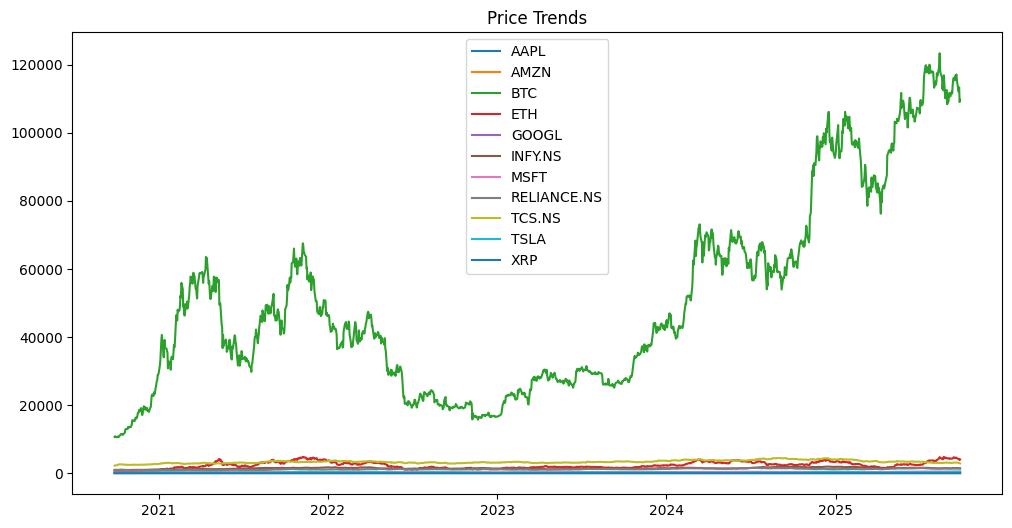

In [35]:
# Check time period
print("Time period:", df_long.index.min(), "to", df_long.index.max())

# Max & Min prices per asset
price_stats = df_long.groupby("Ticker")["Close"].agg(["min", "max", "mean"])
print(price_stats)

# Asset with highest average closing price
highest_avg = price_stats["mean"].idxmax()
print(f"Asset with highest average closing price: {highest_avg}")

# Plot prices over time
plt.figure(figsize=(12,6))
for ticker in df_long["Ticker"].unique():
  plt.plot(df_long[df_long["Ticker"] == ticker].index, df_long[df_long["Ticker"] == ticker]["Close"], label=ticker)
plt.legend()
plt.title("Price Trends")
plt.show()

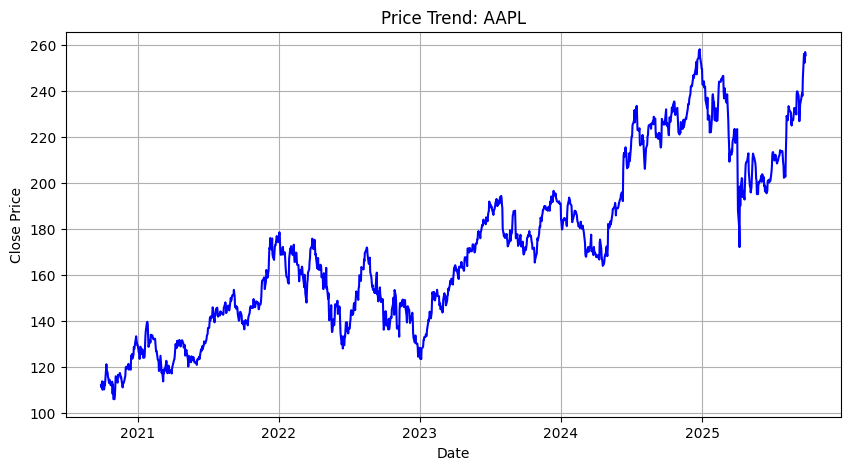

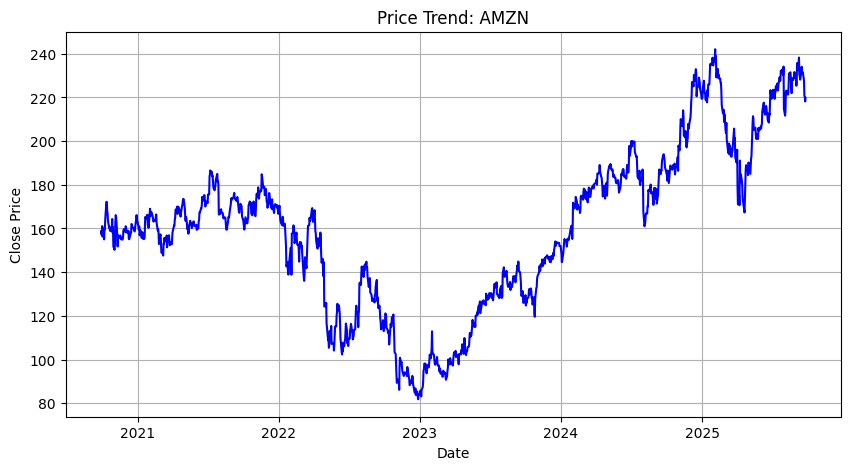

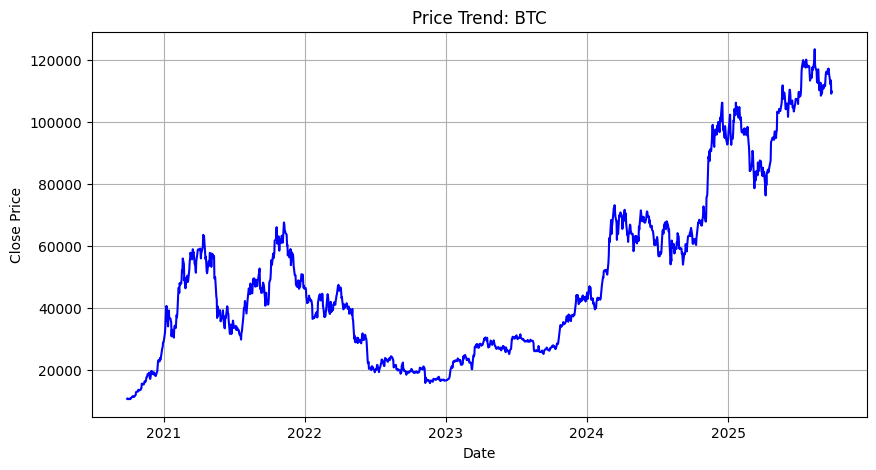

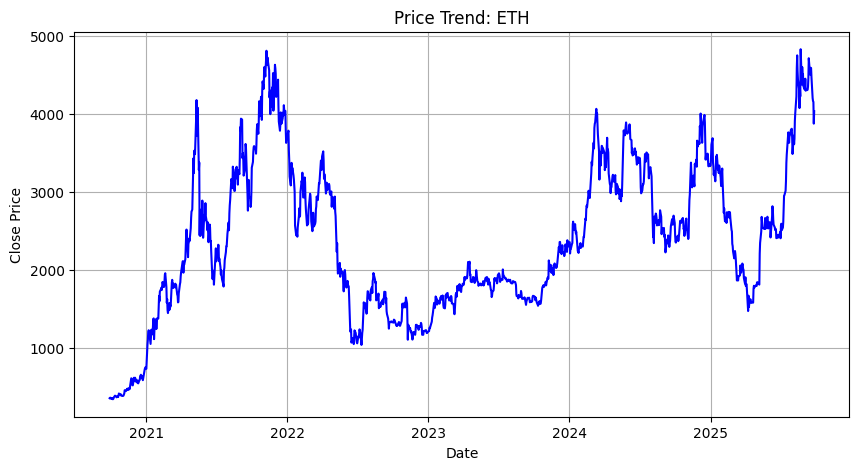

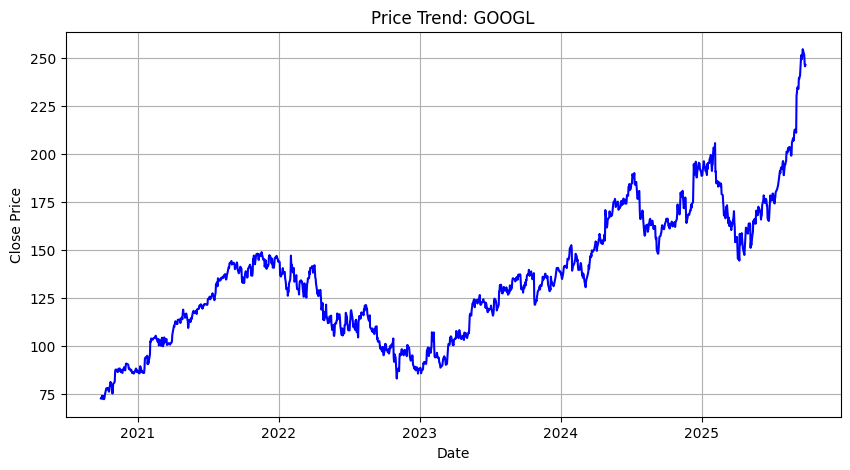

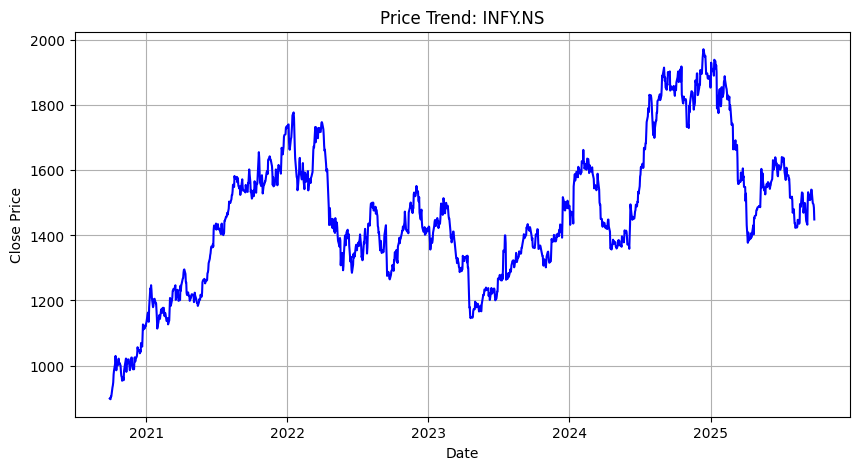

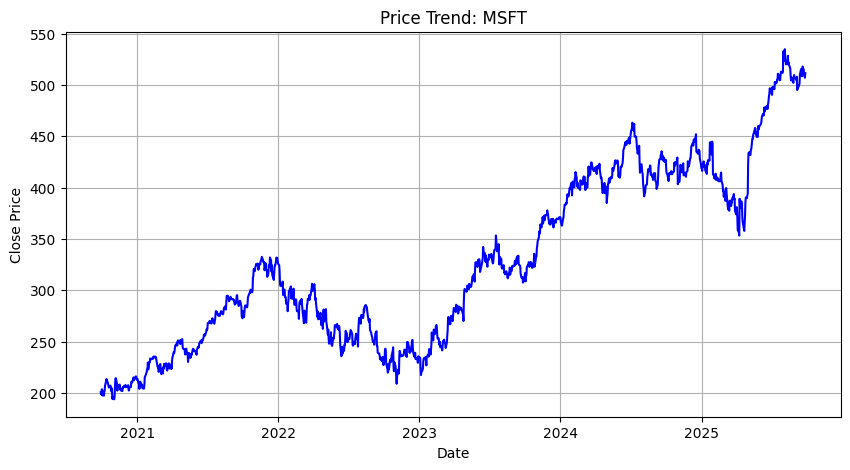

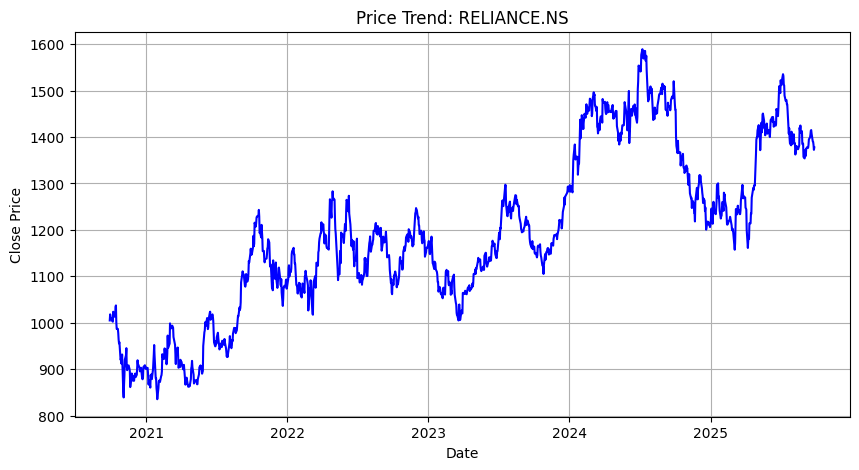

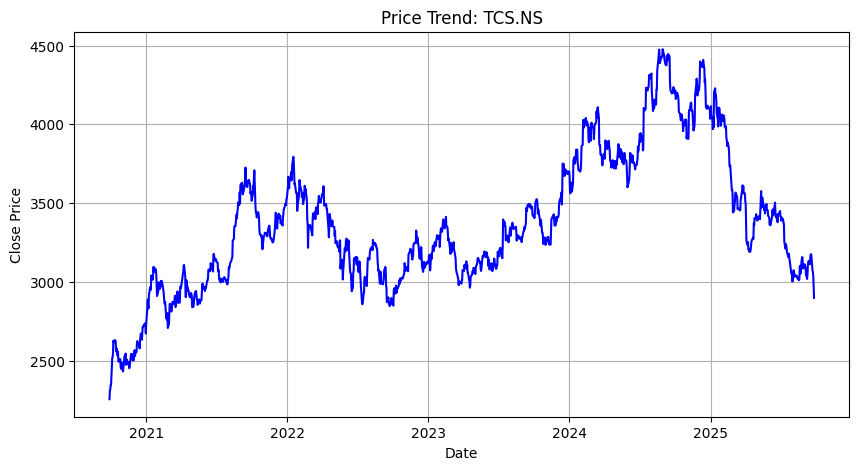

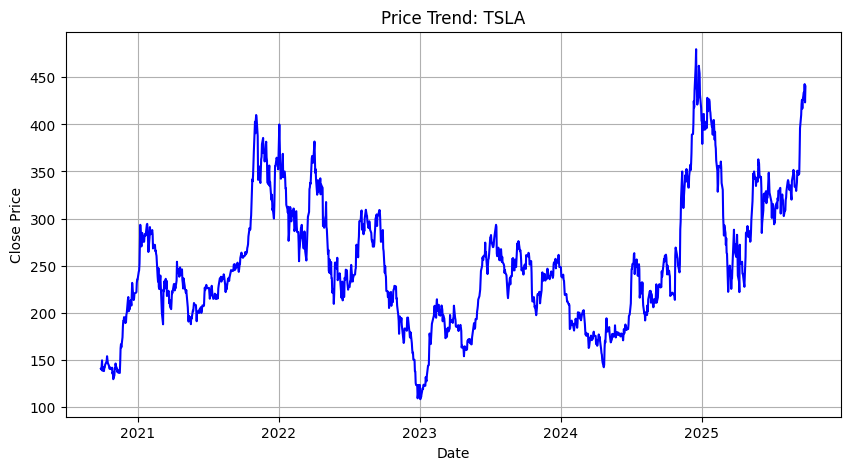

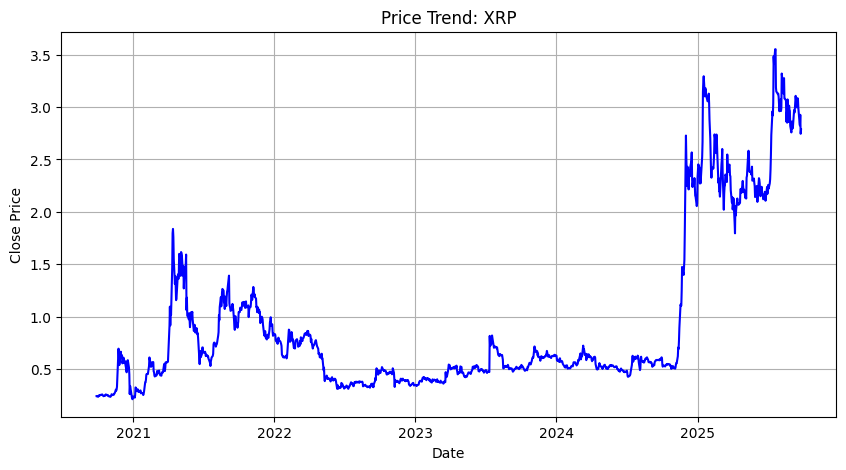

In [34]:
# Individual plots for each asset
for ticker in df_long["Ticker"].unique():
  plt.figure(figsize=(10,5))
  plt.plot(df_long[df_long["Ticker"] == ticker].index,
    df_long[df_long["Ticker"] == ticker]["Close"], color='blue')
  plt.title(f"Price Trend: {ticker}")
  plt.xlabel("Date")
  plt.ylabel("Close Price")
  plt.grid(True)
  plt.show()

## Returns Analysis

In [36]:
# Calculate daily returns
df_long["Return"] = df_long.groupby("Ticker")["Close"].pct_change()

# Avg return & volatility
returns_stats = df_long.groupby("Ticker")["Return"].agg(["mean", "std"])
print(returns_stats)

# Highest average return
print("Highest avg return:", returns_stats["mean"].idxmax())

# Most volatile (highest std)
print("Most volatile asset:", returns_stats["std"].idxmax())

                 mean       std
Ticker                         
AAPL         0.000794  0.017761
AMZN         0.000487  0.021764
BTC          0.002498  0.037521
ETH          0.003131  0.050354
GOOGL        0.001129  0.019229
INFY.NS      0.000480  0.014963
MSFT         0.000850  0.016139
RELIANCE.NS  0.000347  0.014439
TCS.NS       0.000278  0.013044
TSLA         0.001595  0.037943
XRP          0.004100  0.069945
Highest avg return: XRP
Most volatile asset: XRP


## Comparisons

Sector Avg Returns: {'Tech Stocks': np.float64(0.0009710885908313816), 'Cryptos': np.float64(0.003242933854873954), 'Indian Stocks': np.float64(0.0003684921155987401)}


/tmp/ipython-input-2802617881.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cumulative_returns = df_long.groupby("Ticker").apply(lambda x: (1 + x["Return"]).cumprod())


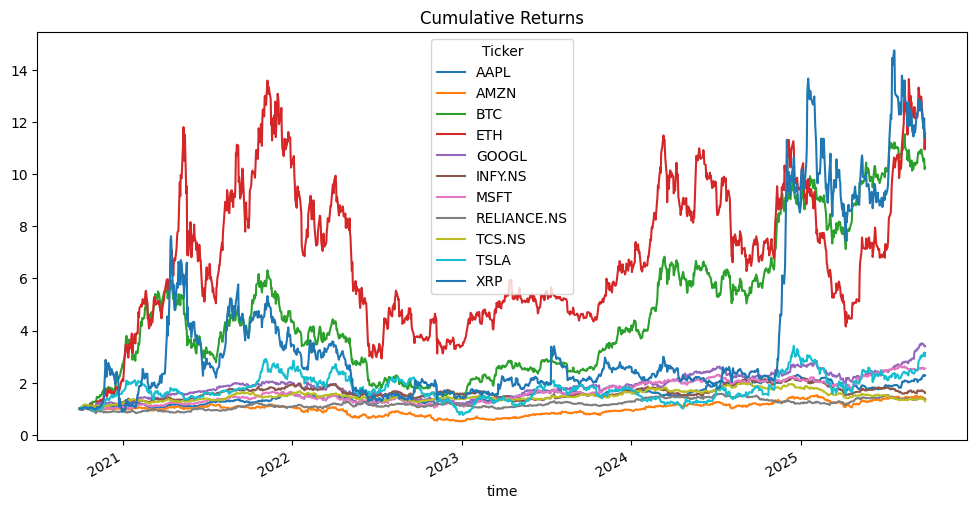

In [38]:
# Define groups
tech_stocks = ["AAPL", "MSFT", "AMZN", "GOOGL", "TSLA"]
cryptos = ["BTC", "ETH", "XRP"]
indian_stocks = ["INFY.NS", "TCS.NS", "RELIANCE.NS"]

# Mean returns by sector
sector_returns = {
    "Tech Stocks": df_long[df_long["Ticker"].isin(tech_stocks)]["Return"].mean(),
    "Cryptos": df_long[df_long["Ticker"].isin(cryptos)]["Return"].mean(),
    "Indian Stocks": df_long[df_long["Ticker"].isin(indian_stocks)]["Return"].mean()
}
print("Sector Avg Returns:", sector_returns)

# Which asset consistently outperformed?
cumulative_returns = df_long.groupby("Ticker").apply(lambda x: (1 + x["Return"]).cumprod())
cumulative_returns.T.plot(figsize=(12,6))
plt.title("Cumulative Returns")
plt.show()

## Correlation and Diversification

Ticker           AAPL      AMZN       BTC       ETH     GOOGL   INFY.NS  \
Ticker                                                                    
AAPL         1.000000  0.580264  0.241532  0.245850  0.580396  0.089908   
AMZN         0.580264  1.000000  0.267057  0.258852  0.629487  0.112612   
BTC          0.241532  0.267057  1.000000  0.791425  0.255183  0.050660   
ETH          0.245850  0.258852  0.791425  1.000000  0.256801  0.088283   
GOOGL        0.580396  0.629487  0.255183  0.256801  1.000000  0.104350   
INFY.NS      0.089908  0.112612  0.050660  0.088283  0.104350  1.000000   
MSFT         0.647135  0.677253  0.291271  0.273915  0.669907  0.123546   
RELIANCE.NS  0.084267  0.102440  0.041925  0.076781  0.091113  0.270548   
TCS.NS       0.109714  0.132860  0.072947  0.123393  0.122306  0.695787   
TSLA         0.490948  0.441981  0.297356  0.294982  0.398393  0.074848   
XRP          0.151524  0.167866  0.470584  0.508948  0.185069  0.055230   

Ticker           MSFT  R

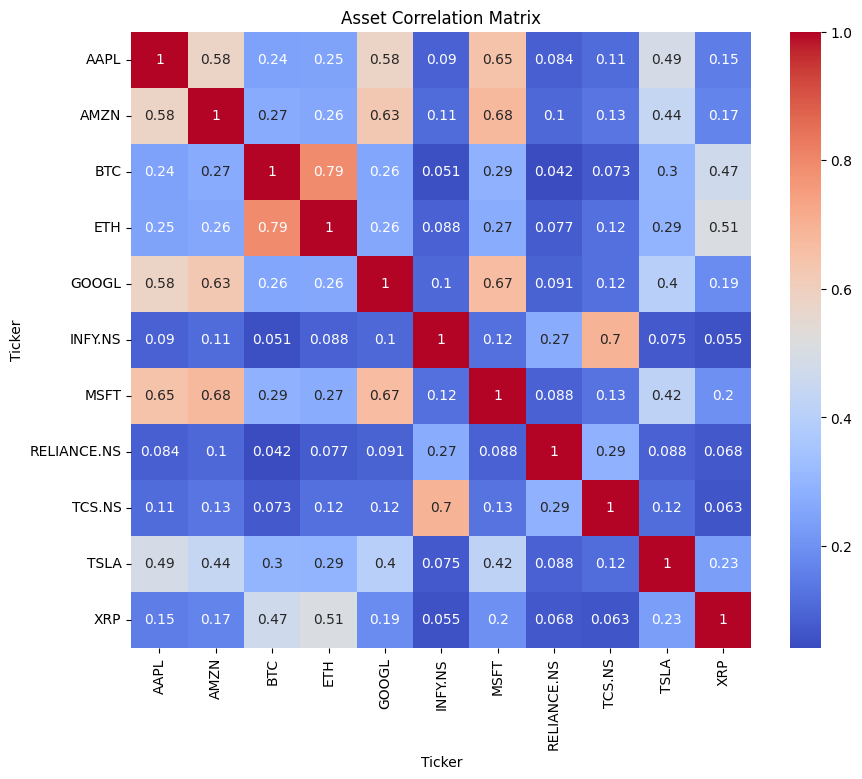

BTC correlation with AAPL: 0.24153192813722943
ETH correlation with MSFT: 0.2739150588152986


In [39]:
# Pivot returns for correlation matrix
returns_wide = df_long.pivot(columns="Ticker", values="Return")
corr_matrix = returns_wide.corr()
print(corr_matrix)

# Heatmap
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Asset Correlation Matrix")
plt.show()

# Check crypto vs tech correlation
print("BTC correlation with AAPL:", corr_matrix.loc["BTC","AAPL"])
print("ETH correlation with MSFT:", corr_matrix.loc["ETH","MSFT"])


## Risk Drawdown

Max Drawdowns: Ticker
AAPL          -0.333605
AMZN          -0.561453
BTC           -0.766686
ETH           -0.784374
GOOGL         -0.443201
INFY.NS       -0.355572
MSFT          -0.371485
RELIANCE.NS   -0.271757
TCS.NS        -0.352410
TSLA          -0.736322
XRP           -0.830593
dtype: float64


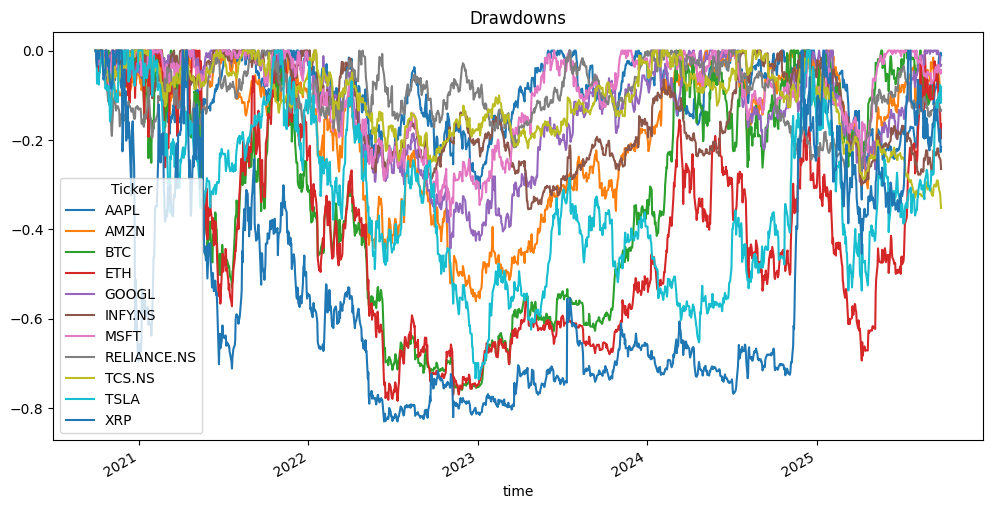

Sharpe Ratios: Ticker
AAPL           0.044678
AMZN           0.022398
BTC            0.066578
ETH            0.062170
GOOGL          0.058692
INFY.NS        0.032091
MSFT           0.052690
RELIANCE.NS    0.024050
TCS.NS         0.021316
TSLA           0.042049
XRP            0.058621
dtype: float64


In [40]:
# Compute cumulative returns
cum_returns = returns_wide.add(1).cumprod()

# Drawdown = (current / max_so_far - 1)
drawdowns = cum_returns / cum_returns.cummax() - 1
max_drawdown = drawdowns.min()
print("Max Drawdowns:", max_drawdown)

# Plot drawdowns
drawdowns.plot(figsize=(12,6))
plt.title("Drawdowns")
plt.show()

# Sharpe ratio
sharpe = returns_stats["mean"] / returns_stats["std"]
print("Sharpe Ratios:", sharpe)

## Rolling Statistics

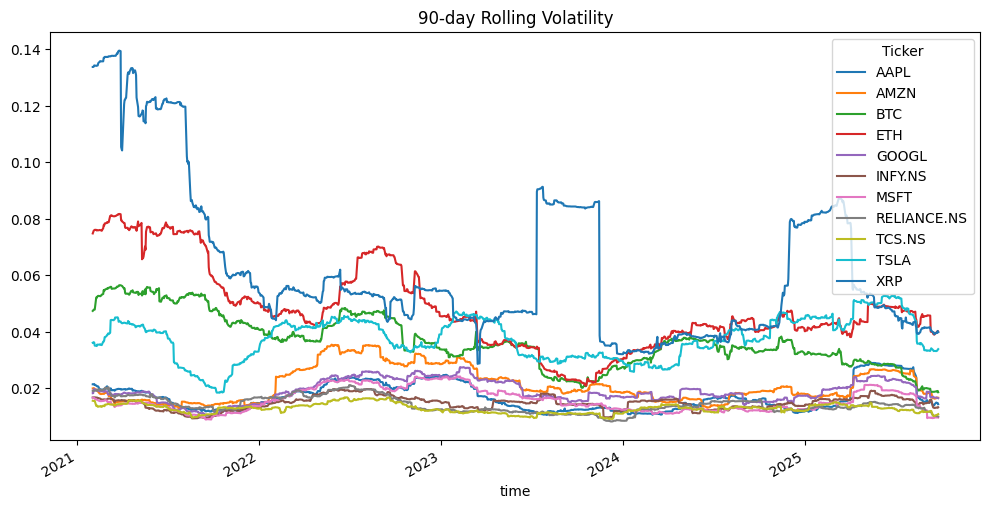

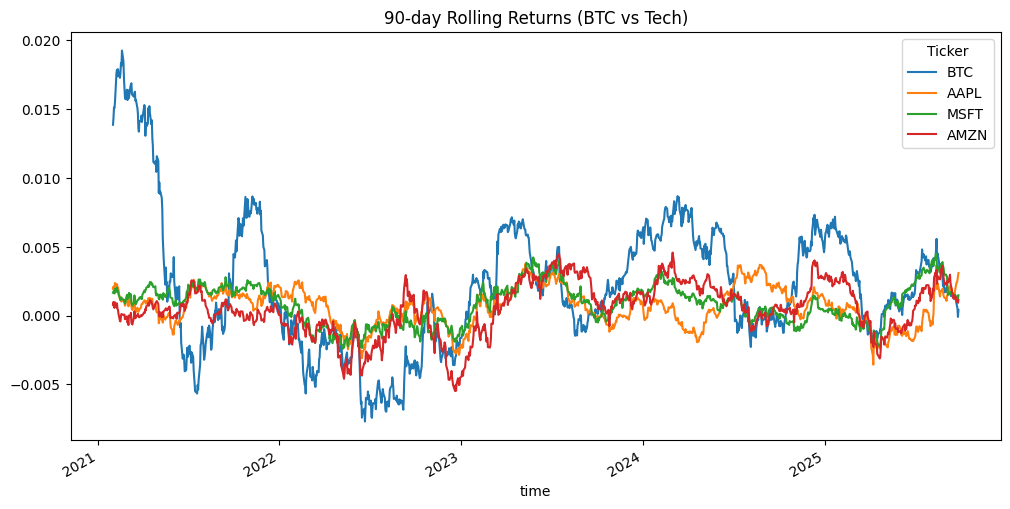

In [41]:
window = 90  # 3 months rolling

# Rolling volatility
rolling_vol = returns_wide.rolling(window).std()
rolling_vol.plot(figsize=(12,6))
plt.title("90-day Rolling Volatility")
plt.show()

# Rolling returns BTC vs NASDAQ stocks
rolling_ret = returns_wide[["BTC", "AAPL", "MSFT", "AMZN"]].rolling(window).mean()
rolling_ret.plot(figsize=(12,6))
plt.title("90-day Rolling Returns (BTC vs Tech)")
plt.show()

## Monthly/Yearly Trends

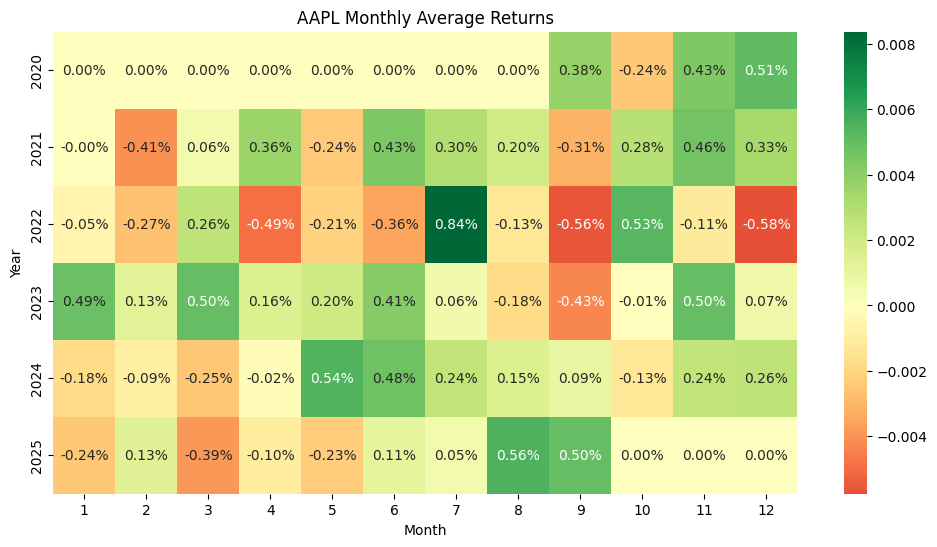

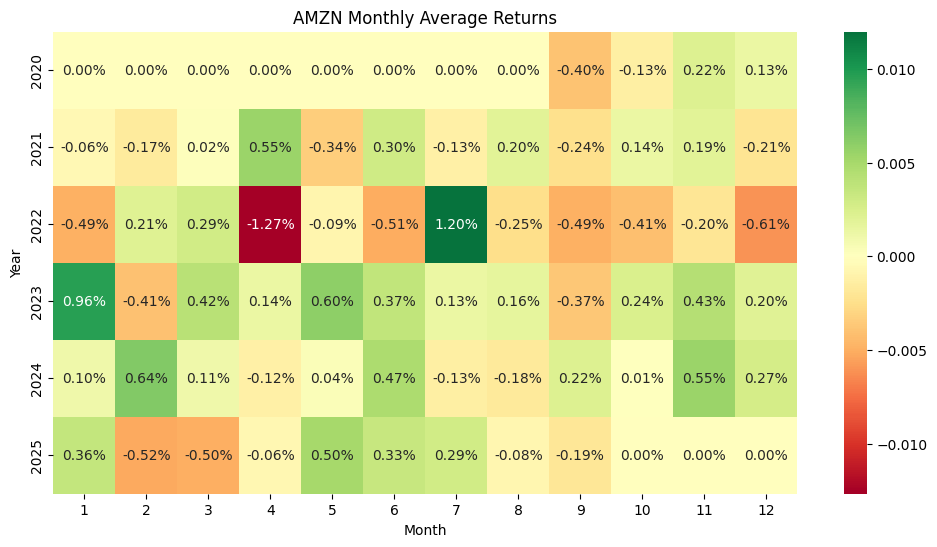

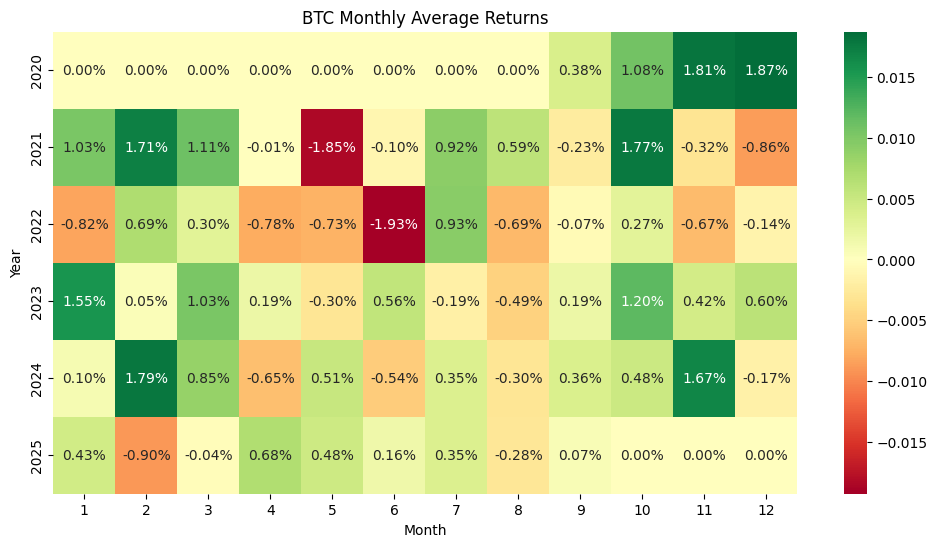

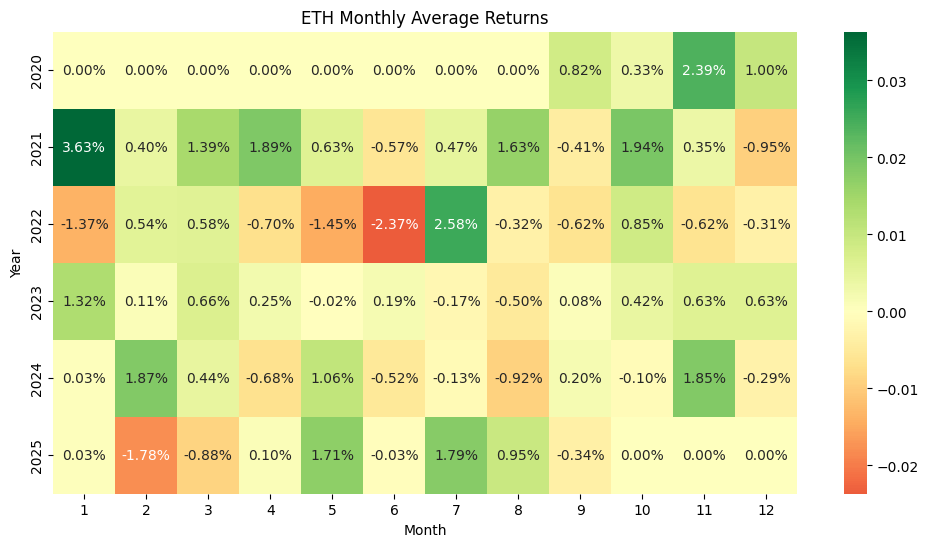

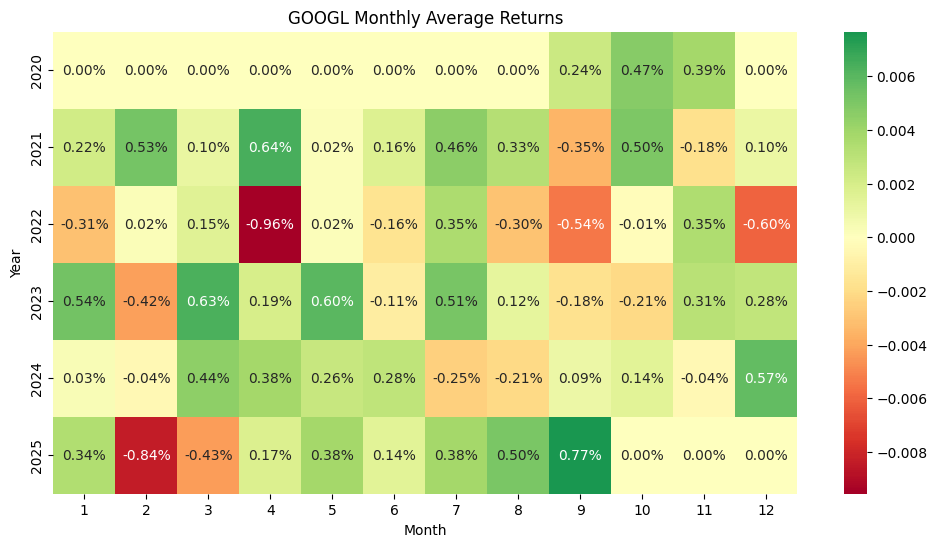

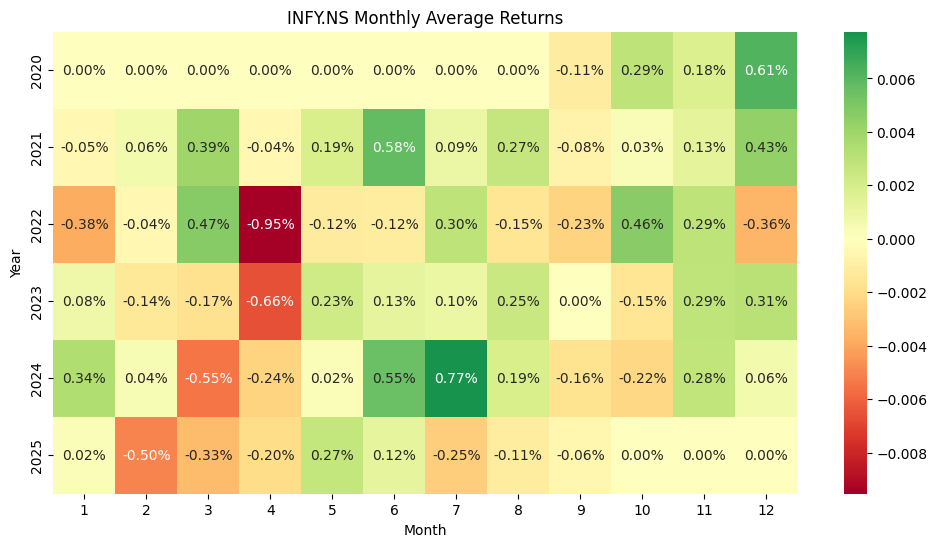

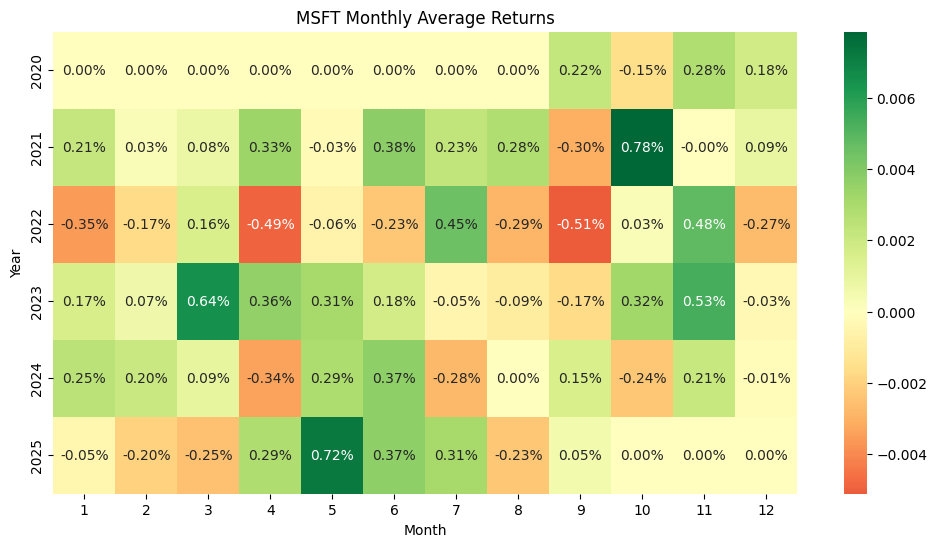

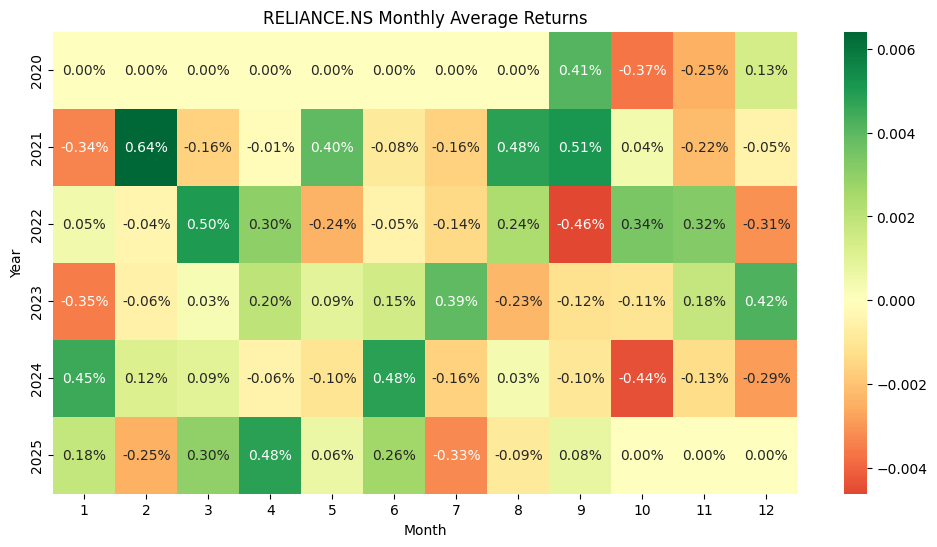

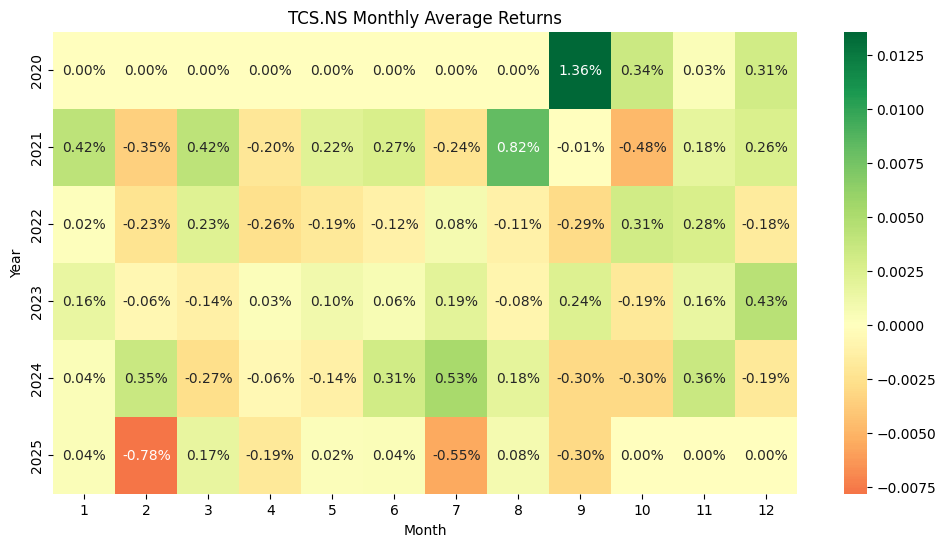

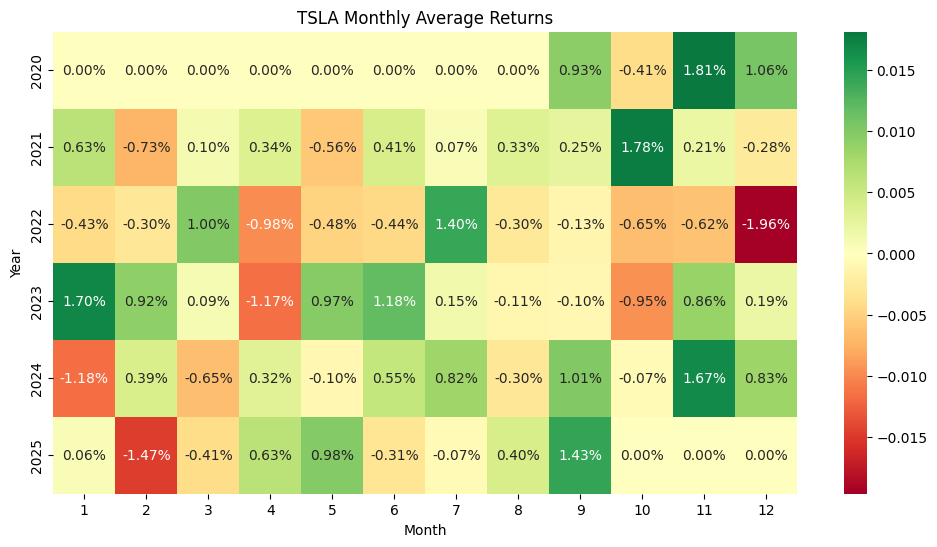

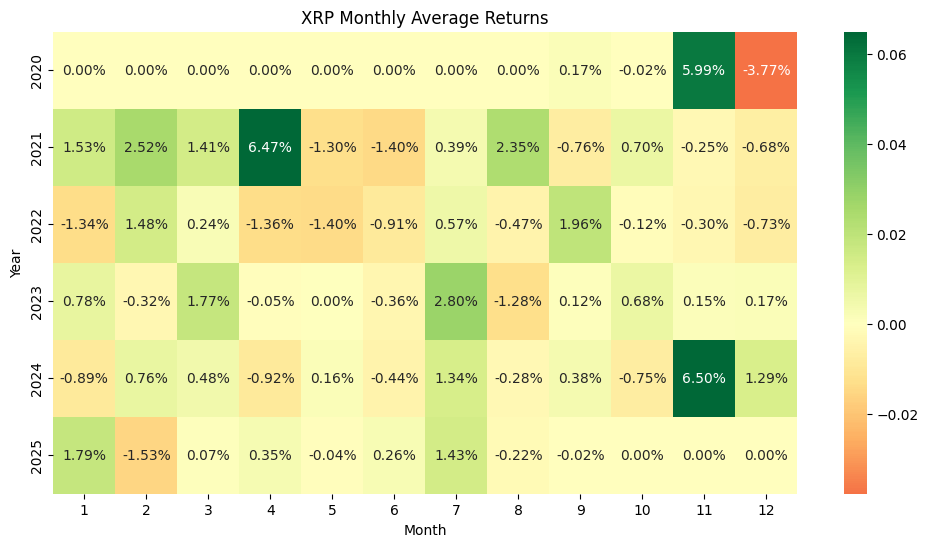

In [44]:
tickers = df_long["Ticker"].unique()

for ticker in tickers:
  asset = df_long[df_long["Ticker"]==ticker].copy()
  asset["Year"] = asset.index.year
  asset["Month"] = asset.index.month

  # Pivot table: Year as rows, Month as columns
  monthly = asset.groupby(["Year","Month"])["Return"].mean().unstack(fill_value=0)
  monthly = monthly.reindex(columns=range(1,13), fill_value=0)  # Ensure Jan-Dec order

  # Plot heatmap
  plt.figure(figsize=(12,6))
  sns.heatmap(monthly, annot=True, fmt=".2%", cmap="RdYlGn", center=0)
  plt.title(f"{ticker} Monthly Average Returns")
  plt.xlabel("Month")
  plt.ylabel("Year")
  plt.show()